# Model the dependence of best-fit parameters upon $M_0.$

In this notebook, we'll use the results of the previous notebook, in which we recorded the set of best-fit parameters for a collection of halos of different mass, $M_0.$ We had ten parameters in total, each of which changed as a function of $M_0.$ So for each of our parameters, we'll build a function that approximates the $M_0$-dependence of that parameters. That collection of ten functions will be our population-level model for ellipticity. In all cases, I'll just use a simple sigmoid function to capture the $M_0-$dependence. What I'll do is hand-tune each sigmoid to give roughly the right result. In a later stage of the project, we'll run an optimizer over the parameters that regulate this collection of sigmoids, optimizing our parameters to give a good description for $P({\rm e}(t)\vert M_0)$ for the full range of halo masses. For now, hand-tuning will be fine for purposes of just determining the general form and roughly approximating a best-fitting point in the parameter space of our population-level model.

In [1]:
%matplotlib inline

In [20]:
from glob import glob

inpat = "prototype_e_pop_fit_results/p_best_logmp_*.npy"
basenames = sorted(glob(inpat))
param_collection = np.array([np.load(f) for f in basenames])
lgmarr = np.array([float(bn.split('_')[-1].replace('.npy', '')) for bn in basenames])

In [21]:
import diffprof.ellipticity_population_model as epm

In [22]:
def _sigmoid(x, x0, k, ymin, ymax):
    height_diff = ymax - ymin
    return ymin + height_diff / (1.0 + np.exp(-k * (x - x0)))

lgmtest = np.linspace(10, 16, 5000)

## Model $\langle \log_{10}\tau_{\rm e}\vert M_0\rangle$

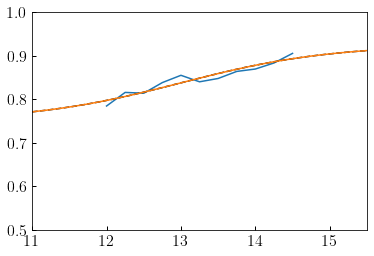

In [23]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(0.5, 1)
__=ax.plot(lgmarr, param_collection[:, 0])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 13, 1, 0.75, 0.925), '--', color='k')
__=ax.plot(lgmtest, epm._mean_lgtc_vs_m0(lgmtest))

## Model $\log_{10}\sigma(\log_{10}\tau_{\rm e}\vert M_0)$

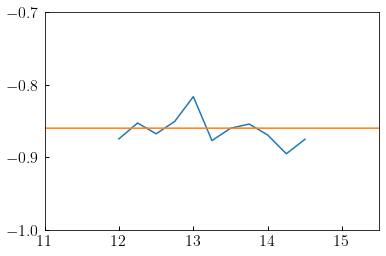

In [24]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(-1, -0.7)
__=ax.plot(lgmarr, param_collection[:, 1])

__=ax.plot(lgmtest, epm._sigma_lgtc_vs_m0(lgmtest))

## Model $U(F_{\rm rounder}(M_{\rm peak}))$

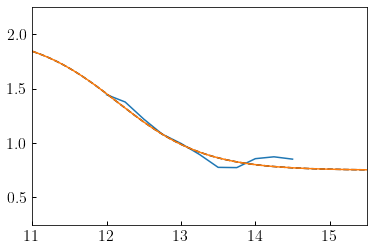

In [25]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(0.25, 2.25)
__=ax.plot(lgmarr, param_collection[:, 2])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 12.15, 1.7, 2, 0.75), '--', color='k')
__=ax.plot(lgmtest, epm._u_frac_rounder_vs_m0(lgmtest))

## Model $\langle \beta^{\rm rounder}_{\rm early}\vert M_0\rangle$

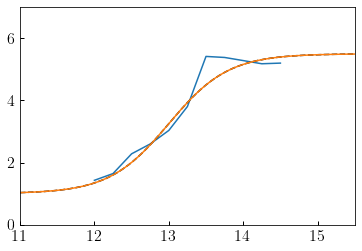

In [26]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(0, 7)
__=ax.plot(lgmarr, param_collection[:, 3])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 13, 2.5, 1, 5.5), '--', color='k')
__=ax.plot(lgmtest, epm._mean_e_early_rounder_vs_m0(lgmtest))

## Model $\langle \beta^{\rm rounder}_{\rm late}\vert M_0\rangle$

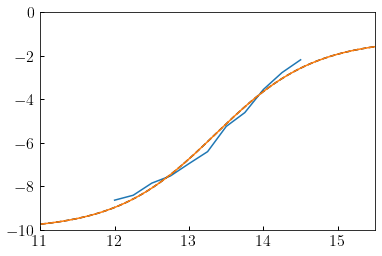

In [27]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(-10, 0)
__=ax.plot(lgmarr, param_collection[:, 4])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 13.35, 1.5, -10, -1.25), '--', color='k')
__=ax.plot(lgmtest, epm._mean_e_late_rounder_vs_m0(lgmtest))

## Model $\langle \beta^{\rm flatter}_{\rm early}\vert M_0\rangle$

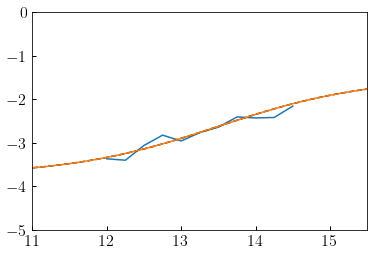

In [28]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(-5, 0)
__=ax.plot(lgmarr, param_collection[:, 5])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 13.5, 1, -3.75, -1.5), '--', color='k')
__=ax.plot(lgmtest, epm._mean_e_early_flatter_vs_m0(lgmtest))

## Model $\langle \beta^{\rm flatter}_{\rm late}\vert M_0\rangle$

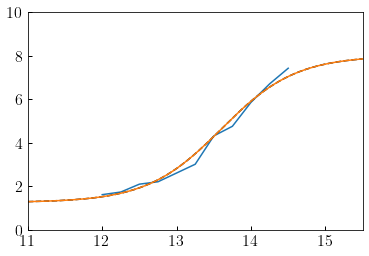

In [29]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(0, 10)
__=ax.plot(lgmarr, param_collection[:, 6])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 13.6, 2, 1.25, 8), '--', color='k')
__=ax.plot(lgmtest, epm._mean_e_late_flatter_vs_m0(lgmtest))

# Model $\log_{10}{\rm Cov}(\beta_{\rm early}, \beta_{\rm early}\vert M_0)$

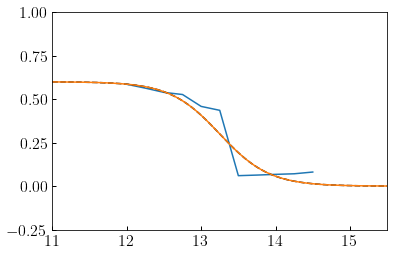

In [30]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(-0.25, 1)
__=ax.plot(lgmarr, param_collection[:, 7])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 13.25, 3, 0.6, 0.0), '--', color='k')
__=ax.plot(lgmtest, epm._chol_e_early_early(lgmtest))

# Model $\log_{10}{\rm Cov}(\beta_{\rm late}, \beta_{\rm late}\vert M_0)$

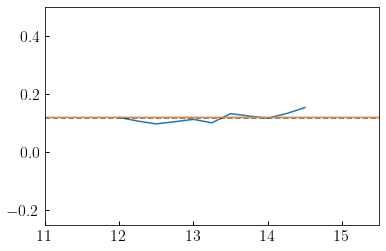

In [31]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(-0.25, 0.5)
__=ax.plot(lgmarr, param_collection[:, 8])

__=ax.plot(lgmtest, np.zeros_like(lgmtest) + param_collection[:, 8].mean(), '--', color='k')
__=ax.plot(lgmtest, epm._chol_e_late_late(lgmtest))

In [32]:
param_collection[:, 8].mean()

0.1187158445357901

# Model ${\rm Cov}(\beta_{\rm early}, \beta_{\rm late}\vert M_0)$

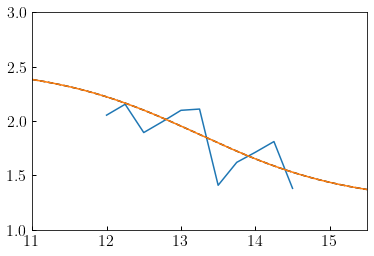

In [33]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(11, 15.5)

ylim = ax.set_ylim(1, 3)
__=ax.plot(lgmarr, param_collection[:, 9])

__=ax.plot(lgmtest, _sigmoid(lgmtest, 13.25, 1, 2.5, 1.25), '--', color='k')
__=ax.plot(lgmtest, epm._chol_e_early_late(lgmtest))

## Check how accurately our population-level model does

Now that we have a rough guess for the best-fitting point in the parameter space of our population-level model, let's see how accurately we can recover $P({\rm e}(t)\vert M_0)$ for a few different halo masses.

In [34]:
from diffprof.load_diffprof_fits import load_bpl_fits, load_mdpl2_fits

drn = "/Users/aphearin/work/DATA/diffprof_data"

mdpl_fits = load_mdpl2_fits(drn)
bpl_fits = load_bpl_fits(drn)

In [35]:
from diffprof.ellipticity_population_model import get_params
from diffprof.predict_e_history_singlemass import e_vs_t_vmap, mc_generate_e_history

lgmparr = np.array((12., 12.75, 13.5, 14.5))
all_params = get_params(lgmparr)

tarr_fit = np.linspace(2.5, 13.8, 100)
target_collection = []
prediction_collection = []


In [36]:
for i, logmp_sample in enumerate(lgmparr):

    if logmp_sample >= 13.5:
        halos = mdpl_fits
    else:
        halos = bpl_fits

    mmsk = np.abs(halos['logmp'] - logmp_sample) < 0.1
    sample = halos[mmsk]

    e_history_target = e_vs_t_vmap(tarr_fit, 10**sample['e_lgtc'], sample['e_k'], sample['e_early'], sample['e_late'])
    e_mean_target = np.mean(e_history_target, axis=0)
    e_std_target = np.std(e_history_target, axis=0)
    target_collection.append((e_mean_target, e_std_target))

    e_history_best = mc_generate_e_history(tarr_fit, all_params[:, i])
    e_h_med_best = np.mean(e_history_best, axis=0)
    e_h_std_best = np.std(e_history_best, axis=0)
    prediction_collection.append((e_h_med_best, e_h_std_best))



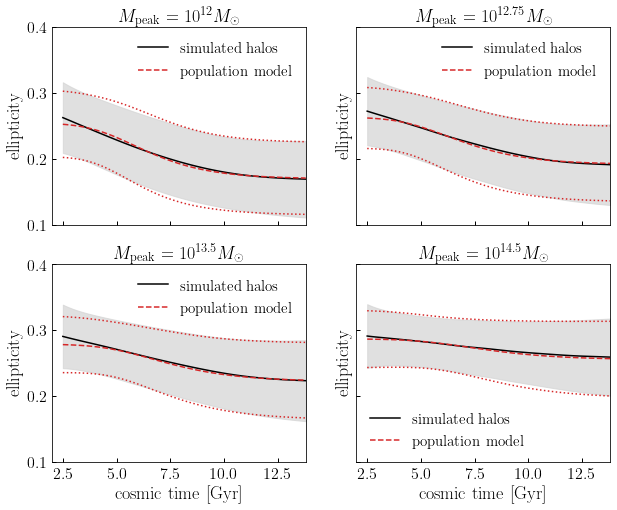

In [37]:
fig, _axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
(ax0, ax1), (ax2, ax3) = _axes
axes = ax0, ax1, ax2, ax3

ylim = ax0.set_ylim(0.1, 0.4)
ylim = ax0.set_xlim(2, 13.8)

for ax, target, pred in zip(axes, target_collection, prediction_collection):
    __=ax.plot(tarr_fit, target[0], color='k', label=r'${\rm simulated\ halos}$')
    __=ax.plot(tarr_fit, pred[0], '--', color=mred, label=r'${\rm population\ model}$')
    ylo, yhi = target[0]-target[1], target[0]+target[1] 
    __=ax.fill_between(tarr_fit, ylo, yhi, alpha=0.7, color='lightgray')

    ylo_pred, yhi_pred = pred[0]-pred[1], pred[0]+pred[1] 
    __=ax.plot(tarr_fit, ylo_pred, ':', color=mred)
    __=ax.plot(tarr_fit, yhi_pred, ':', color=mred)
    leg = ax.legend()

for ax in ax2, ax3:
    xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
for ax in axes:
    ylabel = ax.set_ylabel(r'${\rm ellipticity}$')
    
title = ax0.set_title(r'$M_{\rm peak}=10^{12}M_{\odot}$')
title = ax1.set_title(r'$M_{\rm peak}=10^{12.75}M_{\odot}$')
title = ax2.set_title(r'$M_{\rm peak}=10^{13.5}M_{\odot}$')
title = ax3.set_title(r'$M_{\rm peak}=10^{14.5}M_{\odot}$')

# fig.savefig('population_ellipticity_fit.png', 
#             bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)